In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri
! unzip /content/brain-tumor-classification-mri.zip

In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm import tqdm
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation,Concatenate
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import io

In [3]:
classes = os.listdir("/content/Training")
print(classes)

['meningioma_tumor', 'pituitary_tumor', 'glioma_tumor', 'no_tumor']


In [4]:
X = []
y = []
image_size = 150
for i in classes:
    folderPath = os.path.join('/content/Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X.append(img)
        y.append(i)
        
for i in classes:
    folderPath = os.path.join('/content/Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X.append(img)
        y.append(i)
        
X = np.array(X)
y = np.array(y)

100%|██████████| 105/105 [00:00<00:00, 519.86it/s]


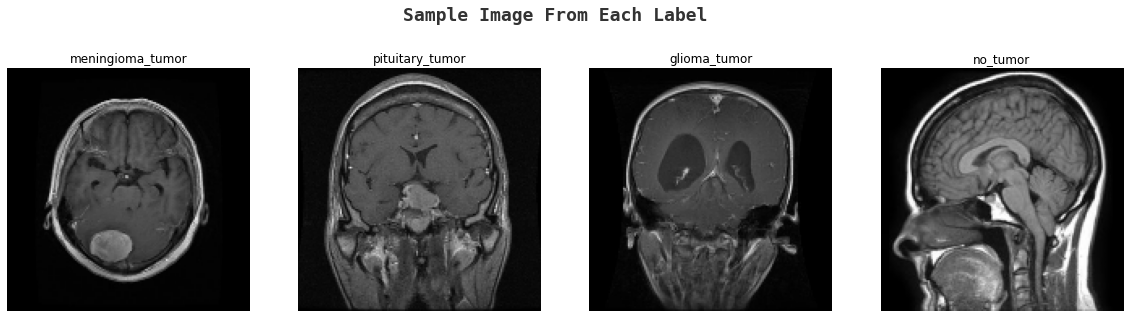

In [5]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',y=0.62,x=0.4,alpha=0.8)
for i in classes:
    j=0
    while True :
        if y[j]==i:
            ax[k].imshow(X[j])
            ax[k].set_title(y[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=101)

In [7]:
y_train_new = []
for i in y_train:
    y_train_new.append(classes.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(classes.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [8]:
img_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

img_datagen.fit(X_train)
img_datagen.fit(X_test)

In [9]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same',input_shape=(image_size,image_size,3))) 
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization()) 

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(BatchNormalization())
model.add(Dropout(0.35)) #64 --> 42

model.add(Conv2D(64, (3, 3), padding='same')) 
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Flatten()) 
model.add(Dropout(0.5)) 
model.add(Dense(512)) 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(4)) 
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 activation (Activation)     (None, 150, 150, 64)      0         
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 64)      36928     
                                                                 
 activation_1 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                      

In [10]:
model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [11]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs =8, verbose=1, batch_size=32)

Epoch 1/8
74/74 [==============================] - 24s 119ms/step - loss: 1.2198 - accuracy: 0.6603 - val_loss: 3.1748 - val_accuracy: 0.3588
Epoch 2/8
74/74 [==============================] - 7s 97ms/step - loss: 0.5292 - accuracy: 0.8046 - val_loss: 7.1285 - val_accuracy: 0.1908
Epoch 3/8
74/74 [==============================] - 7s 97ms/step - loss: 0.3820 - accuracy: 0.8565 - val_loss: 0.3923 - val_accuracy: 0.8740
Epoch 4/8
74/74 [==============================] - 7s 98ms/step - loss: 0.2071 - accuracy: 0.9285 - val_loss: 0.2722 - val_accuracy: 0.9122
Epoch 5/8
74/74 [==============================] - 7s 97ms/step - loss: 0.2211 - accuracy: 0.9221 - val_loss: 0.3601 - val_accuracy: 0.8740
Epoch 6/8
74/74 [==============================] - 7s 97ms/step - loss: 0.1391 - accuracy: 0.9447 - val_loss: 0.2374 - val_accuracy: 0.9237
Epoch 7/8
74/74 [==============================] - 7s 98ms/step - loss: 0.1075 - accuracy: 0.9608 - val_loss: 0.2848 - val_accuracy: 0.9008
Epoch 8/8
74/74 [=

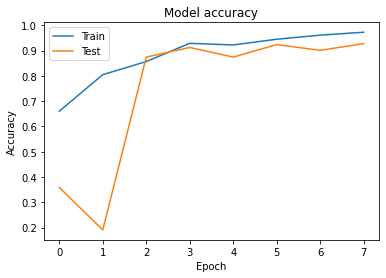

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

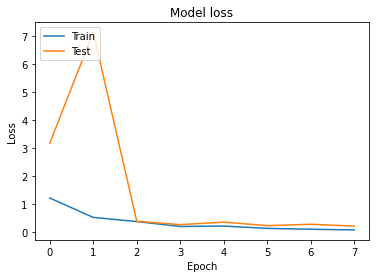

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [14]:
def img_pred(upload):
    for name, file_info in uploader.value.items():
        img = Image.open(io.BytesIO(file_info['content']))
    opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    img = cv2.resize(opencvImage,(150,150))
    img = img.reshape(1,150,150,3)
    p = model.predict(img)
    p = np.argmax(p,axis=1)[0]

    if p==0:
        p='Glioma Tumor'
    elif p==1:
        print('The model predicts that there is no tumor')
    elif p==2:
        p='Meningioma Tumor'
    else:
        p='Pituitary Tumor'

    if p!=1:
        print(f'The Model predicts that it is a {p}')

In [15]:
import ipywidgets as widgets

uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

In [16]:
from IPython.display import display,clear_output

button = widgets.Button(description='Predict')
out = widgets.Output()
def on_button_clicked(_):
    with out:
        clear_output()
        try:
            img_pred(uploader)
            
        except:
            print('No Image Uploaded/Invalid Image File')
button.on_click(on_button_clicked)
widgets.VBox([button,out])